# 5.11 tf.keras.layers.LSTMCell クラス

## tf.keras.layers.LSTMCell クラス

<code>
tensorflow.keras.layers.LSTM(
    units,
    activation='tanh',
    recurrent_activation='sigmoid',
    use_bias=True,
    kernel_initializer='glorot_uniform',
    recurrent_initializer='orthogonal',
    bias_initializer=None,
    recurrent_regularizer=Nonde,
    bias_regularizer=None,
    activity_regularizer=None,
    kernel_constraint=None,
    dropout=0.0,
    recurrent_dropout=0.0,
    implementation=2
    )
</code>

## Fashion-MNIST の分類問題を RNN で解く

画像 (28x28) データをRNNで扱うことにする。
列方向(28個のデータ)を一度にRNNに入力する。
各層のLSTMセルの個数は 128 とし、これを3段重ねる。

## loss='sparse_categorical_crossentropy' を使って解く

In [1]:
# 5-11-1 Fashion-MNIST データセットの読み込み
# p.382
from tensorflow import keras

(x_train, t_train), (x_test, t_test) = keras.datasets.fashion_mnist.load_data()

print(x_train.shape, t_train.shape)
print(x_test.shape, t_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


In [2]:
# データを正規化する [0,255] --> [0,1]
x_train_norm = x_train / 255
x_test_norm = x_test / 255

In [8]:
# 5-11-2 LSTM を組み込んだネットワークを構築する
# p.384
# [自分へのメモ] 関数呼び出しでネットワークを構築するように変更した

import tensorflow as tf
from tensorflow import keras

def getModel(input_dim, output_dim):
    weight_decay = 1e-4
    model = keras.models.Sequential()
    # 入力層
    model.add(keras.layers.InputLayer(input_shape=input_dim))
    # 中間層
    model.add(keras.layers.LSTM(units=128, dropout=0.25, return_sequences=True))
    model.add(keras.layers.LSTM(units=128, dropout=0.25, return_sequences=True))
    model.add(keras.layers.LSTM(units=128, dropout=0.5, 
                                return_sequences=False,   ### !!! LSTMの最後の層では内部状態を出力しない
                                kernel_regularizer=keras.regularizers.l2(weight_decay)))
    # 出力層
    model.add(keras.layers.Dense(units=output_dim, activation='softmax'))
    return model

In [9]:
model = getModel(x_train_norm[0].shape, 10)

In [11]:
model.compile(
    loss='sparse_categorical_crossentropy',
    #loss='categorical_crossentropy',
    optimizer=keras.optimizers.Adam(),
    metrics=['accuracy']
    )

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 28, 128)           80384     
_________________________________________________________________
lstm_4 (LSTM)                (None, 28, 128)           131584    
_________________________________________________________________
lstm_5 (LSTM)                (None, 128)               131584    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 344,842
Trainable params: 344,842
Non-trainable params: 0
_________________________________________________________________


In [12]:
%%time
# 5-11-3 学習を開始
epoch = 100
batch_size = 64

history = model.fit(
    x_train_norm,
    t_train,
    epochs=epoch,
    batch_size=batch_size,
    verbose=1,
    validation_split=0.2
    )

Epoch 1/100
750/750 [==============================] - 8s 10ms/step - loss: 0.6931 - accuracy: 0.7447 - val_loss: 0.4975 - val_accuracy: 0.8267
Epoch 2/100
750/750 [==============================] - 6s 8ms/step - loss: 0.4976 - accuracy: 0.8194 - val_loss: 0.4474 - val_accuracy: 0.8386
Epoch 3/100
750/750 [==============================] - 6s 9ms/step - loss: 0.4410 - accuracy: 0.8399 - val_loss: 0.4080 - val_accuracy: 0.8547
Epoch 4/100
750/750 [==============================] - 7s 9ms/step - loss: 0.4094 - accuracy: 0.8493 - val_loss: 0.3641 - val_accuracy: 0.8697
Epoch 5/100
750/750 [==============================] - 7s 9ms/step - loss: 0.3915 - accuracy: 0.8565 - val_loss: 0.3561 - val_accuracy: 0.8727
Epoch 6/100
750/750 [==============================] - 7s 9ms/step - loss: 0.3720 - accuracy: 0.8652 - val_loss: 0.3494 - val_accuracy: 0.8768
Epoch 7/100
750/750 [==============================] - 7s 10ms/step - loss: 0.3632 - accuracy: 0.8669 - val_loss: 0.3513 - val_accuracy: 0.87

Epoch 58/100
750/750 [==============================] - 7s 10ms/step - loss: 0.1925 - accuracy: 0.9308 - val_loss: 0.2884 - val_accuracy: 0.9046
Epoch 59/100
750/750 [==============================] - 7s 10ms/step - loss: 0.1887 - accuracy: 0.9323 - val_loss: 0.2829 - val_accuracy: 0.9041
Epoch 60/100
750/750 [==============================] - 7s 9ms/step - loss: 0.1898 - accuracy: 0.9324 - val_loss: 0.2822 - val_accuracy: 0.9067
Epoch 61/100
750/750 [==============================] - 7s 9ms/step - loss: 0.1908 - accuracy: 0.9320 - val_loss: 0.2878 - val_accuracy: 0.9057
Epoch 62/100
750/750 [==============================] - 7s 9ms/step - loss: 0.1868 - accuracy: 0.9335 - val_loss: 0.2794 - val_accuracy: 0.9070
Epoch 63/100
750/750 [==============================] - 7s 9ms/step - loss: 0.1831 - accuracy: 0.9348 - val_loss: 0.2883 - val_accuracy: 0.9068
Epoch 64/100
750/750 [==============================] - 7s 9ms/step - loss: 0.1841 - accuracy: 0.9345 - val_loss: 0.2951 - val_accurac

In [13]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


In [14]:
# 5-02-23 損失と精度の推移をグラフにする
# p.317
# [自分へのメモ] 独自のコードで書き直した

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

def plot_history(history):
    fig, ax = plt.subplots(1, 2, figsize=(6*2, 4))
    
    ax[0].plot(history['accuracy'], "-", label="accuracy",c="blue")
    ax[0].plot(history['val_accuracy'], "-", label="val_accuracy",c="green")
    ax[0].set_title('model accuracy')
    ax[0].set_xlabel('epoch')
    ax[0].set_ylabel('accuracy')
    ax[0].legend(loc="lower right")
    
    ax[1].plot(history['loss'], "-", label="loss", c="blue")
    ax[1].plot(history['val_loss'], "-", label="val_loss", c="green")
    ax[1].set_title('model loss')
    ax[1].set_xlabel('epoch')
    ax[1].set_ylabel('loss')
    ax[1].legend(loc="upper left")

    plt.subplots_adjust(wspace=0.1)
    plt.show()

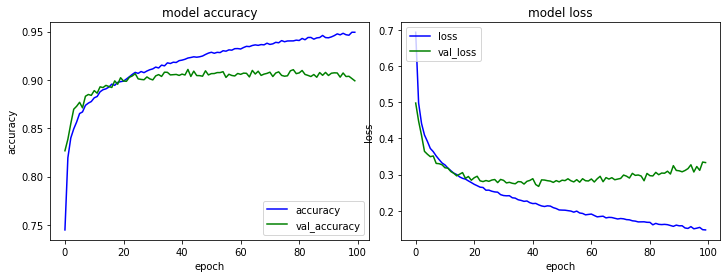

In [15]:
plot_history(history.history)

In [21]:
# 学習結果を評価する
test_loss, test_acc = model.evaluate(x_test_norm, t_test, verbose=0)
print(f'test_loss: {test_loss:.4f}  test_acc: {test_acc:.4f}')

test_loss: 0.3589  test_acc: 0.8961


## loss='categorical_crossentropy' を使って解く

In [16]:
model2 = getModel(x_train_norm[0].shape, 10)

In [17]:
# 正解ラベルを one-hot vector 化する
t_train_cat = keras.utils.to_categorical(t_train, 10)
t_test_cat = keras.utils.to_categorical(t_test, 10)

In [18]:
model2.compile(
    loss='categorical_crossentropy',   ### !!!
    optimizer=keras.optimizers.Adam(),
    metrics=['accuracy']
    )

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 28, 128)           80384     
_________________________________________________________________
lstm_4 (LSTM)                (None, 28, 128)           131584    
_________________________________________________________________
lstm_5 (LSTM)                (None, 128)               131584    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 344,842
Trainable params: 344,842
Non-trainable params: 0
_________________________________________________________________


In [19]:
%%time
# 5-11-3 学習を開始
epoch = 100
batch_size = 64

history2 = model2.fit(
    x_train_norm,
    t_train_cat,   ### !!!
    epochs=epoch,
    batch_size=batch_size,
    verbose=1,
    validation_split=0.2
    )

Epoch 1/100
750/750 [==============================] - 7s 10ms/step - loss: 0.6953 - accuracy: 0.7442 - val_loss: 0.5092 - val_accuracy: 0.8208
Epoch 2/100
750/750 [==============================] - 6s 9ms/step - loss: 0.4998 - accuracy: 0.8193 - val_loss: 0.4255 - val_accuracy: 0.8465
Epoch 3/100
750/750 [==============================] - 7s 9ms/step - loss: 0.4428 - accuracy: 0.8385 - val_loss: 0.4035 - val_accuracy: 0.8555
Epoch 4/100
750/750 [==============================] - 8s 10ms/step - loss: 0.4132 - accuracy: 0.8475 - val_loss: 0.3993 - val_accuracy: 0.8575
Epoch 5/100
750/750 [==============================] - 8s 10ms/step - loss: 0.3945 - accuracy: 0.8566 - val_loss: 0.3620 - val_accuracy: 0.8705
Epoch 6/100
750/750 [==============================] - 7s 10ms/step - loss: 0.3749 - accuracy: 0.8626 - val_loss: 0.3731 - val_accuracy: 0.8648
Epoch 7/100
750/750 [==============================] - 7s 9ms/step - loss: 0.3681 - accuracy: 0.8665 - val_loss: 0.3492 - val_accuracy: 0.

Epoch 58/100
750/750 [==============================] - 8s 11ms/step - loss: 0.1926 - accuracy: 0.9307 - val_loss: 0.2893 - val_accuracy: 0.9076
Epoch 59/100
750/750 [==============================] - 8s 11ms/step - loss: 0.1919 - accuracy: 0.9323 - val_loss: 0.2852 - val_accuracy: 0.9081
Epoch 60/100
750/750 [==============================] - 8s 10ms/step - loss: 0.1889 - accuracy: 0.9319 - val_loss: 0.3029 - val_accuracy: 0.9044
Epoch 61/100
750/750 [==============================] - 8s 10ms/step - loss: 0.1914 - accuracy: 0.9314 - val_loss: 0.2896 - val_accuracy: 0.9043
Epoch 62/100
750/750 [==============================] - 8s 11ms/step - loss: 0.1867 - accuracy: 0.9331 - val_loss: 0.2947 - val_accuracy: 0.9027
Epoch 63/100
750/750 [==============================] - 8s 11ms/step - loss: 0.1907 - accuracy: 0.9318 - val_loss: 0.2916 - val_accuracy: 0.9072
Epoch 64/100
750/750 [==============================] - 8s 11ms/step - loss: 0.1847 - accuracy: 0.9341 - val_loss: 0.2827 - val_ac

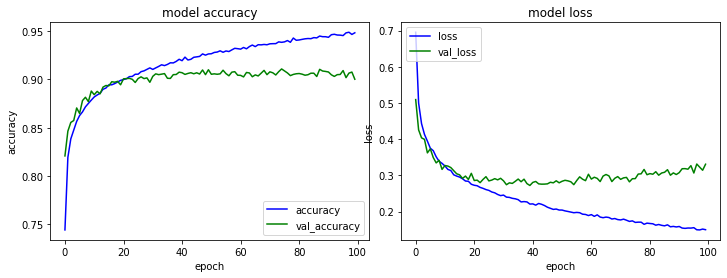

In [20]:
plot_history(history2.history)

In [22]:
# 学習結果を評価する
test_loss, test_acc = model2.evaluate(x_test_norm, t_test_cat, verbose=0)
print(f'test_loss: {test_loss:.4f}  test_acc: {test_acc:.4f}')

test_loss: 0.3497  test_acc: 0.8963
